# Taller 3 ANALNUM

Trabajo entregado por Sergio Bello, Mateo Manosalva y Santiago Ochoa

## Punto 1

In [8]:
A= [[ 0 -20 14] ; [-3 27 4] ; [-4 11 2]] ;


%Se obtienen los vectores columna de A
V1 = A(:,1);
V2 = A(:,2);
V3 = A(:,3);

%Proceso de Gram-Schmidt
%Cálculo de la base ortonormal
U1 = V1/norm(V1);
U2 = V2 - dot(U1,V2)*U1/dot(U1,U1);
U2 = U2/norm(U2);
U3 = V3 - dot(U1,V3)*U1/dot(U1,U1) - dot(U2,V3)*U2/dot(U2,U2);
U3 = U3/norm(U3);

%Cálculo de la matriz R
Q_G= [U1 U2 U3];
R_G=Q_G'*A;
disp('Matriz Q del método de Gram-Schmidt:')
disp(Q_G)
disp('Matriz R del método de Gram-Schimdt')
disp(R_G)
%Transformación de Householder;

A_H=A;
W1=V1;
a_1 = W1-norm(W1)*[1 ; 0 ; 0];
H_1= eye(3) - 2*(a_1*a_1')/dot(a_1,a_1);
A_H=H_1*A;
W2=A_H(2:end,2);
a_2 = W2 - norm(W2)*[1 ; 0];
H_2 = eye(2) - 2*(a_2*a_2')/dot(a_2,a_2);
H_2(3,3)=1;
H_2=circshift(H_2,[1 1]);

Q_H = H_1*H_2;
R_H = H_2*H_1*A;

disp('Matriz Q de la Transformación de Householder')
disp(Q_H)
disp('Matriz R de la Transformación de Householder')
disp(R_H)

Matriz Q del método de Gram-Schmidt:
                   0  -0.800000000000000   0.600000000000000
  -0.600000000000000   0.480000000000000   0.640000000000000
  -0.800000000000000  -0.360000000000000  -0.480000000000000
Matriz R del método de Gram-Schimdt
   5.000000000000000e+00  -2.500000000000000e+01  -4.000000000000000e+00
                       0   2.500000000000000e+01  -1.000000000000000e+01
   4.440892098500626e-16   3.552713678800501e-15   9.999999999999998e+00
Matriz Q de la Transformación de Householder
                   0  -0.800000000000000   0.600000000000000
  -0.600000000000000   0.480000000000000   0.640000000000000
  -0.800000000000000  -0.360000000000000  -0.480000000000000
Matriz R de la Transformación de Householder
    5  -25   -4
    0   25  -10
    0    0   10


## Punto 2


Matriz de ecuaciones normales
 Columns 1 through 4:

   24163571680850    1299155279940      70540730666       3877286700
    1299155279940      70540730666       3877286700        216455810
      70540730666       3877286700        216455810         12333300
       3877286700        216455810         12333300           722666
        216455810         12333300           722666            44100
         12333300           722666            44100             2870

 Columns 5 and 6:

        216455810         12333300
         12333300           722666
           722666            44100
            44100             2870
             2870              210
              210               21
 Columns 1 through 4:

   24163571680850    1299155279940      70540730666       3877286700
    1299155279940      70540730666       3877286700        216455810
      70540730666       3877286700        216455810         12333300
       3877286700        216455810         12333300           722666
    

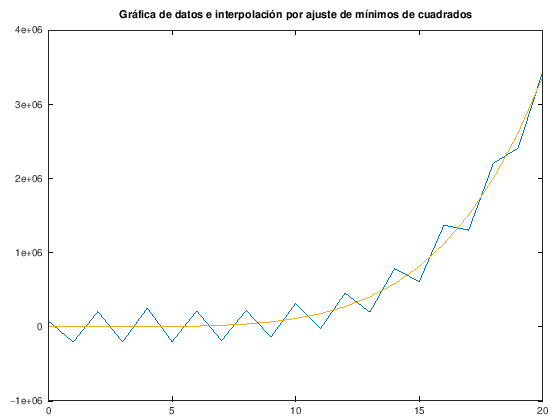

In [6]:
Datos = [ [0     75901]
 [1   -204794]
 [2    204863]
 [3   -204436]
 [4    253665]
 [5   -200894]
 [6    214131]
 [7   -185192]
 [8    221249]
 [9   -138370]
[10    315911]
[11    -27644]
[12    455253]
[13    197434]
[14    783995]
[15    608816]
[16   1370781]
[17   1303798]
[18   2205519]
[19   2408860]
[20   3444321] ];

format long;
%Extraemos de la matriz de Datos los vectores B y X del sistema AX=B
B=Datos(:,2);
X=Datos(:,1);

%Definimos la matriz de Vandermonde
I=ones(length(X),1);
A=[X.^5  X.^4  X.^3  X.^2  X  I];

%Solución usando el método de ecuaciones normales
N=transpose(A)*A;
B_n=transpose(A)*B;

disp('Matriz de ecuaciones normales');
disp(N);
C_n=zeros(6,1);
for k=1:5
    disp(N);
    for i = k+1:6
        m=N(i,k)/N(k,k);
        for j = k+1:6
            N(i,j)=N(i,j)-m*N(k,j);
        end
        B_n(i)=B_n(i)-m*B_n(k);
    end
end

for i=6:-1:1
   C_n(i)=(1/(N(i,i)))*(B_n(i)-dot(N(i,i+1:end),C_n(i+1:end)));
end

disp('Coeficientes obtenidos con el método de ecuaciones normales:');
disp(fliplr(C_n'));
n_1=norm(A*C_n - B);
disp('Norma residual:')
disp(n_1);
D_1=ones(6,1)-C_n;
disp('Diferencias relativas:');
disp(fliplr(D_1'));

%Solución usando factorización QR
[Q,R]=qr(A);

B_q=transpose(Q)*B;
C_q=zeros(6,1);

for i=6:-1:1
   C_q(i)=(1/(R(i,i)))*(B_q(i)-dot(R(i,i+1:6),C_q(i+1:6)));
end

disp('Coeficientes obtenidos con el método de factorización QR:');
disp(fliplr(C_q'));
n_2=norm(A*C_q - B);
disp('Norma residual:')
disp(n_2);
D_2=ones(6,1)-C_q;
disp('Diferencias relativas:');
disp(fliplr(D_2'));

%Definimos los polinomios con los coeficientes resultantes
pol_1=C_n(6)*X.^5 + C_n(5)*X.^4 + C_n(4)*X.^3 + C_n(3)*X.^2 + C_n(2)*X + C_n(1)*I;
pol_2=C_q(6)*X.^5 + C_q(5)*X.^4 + C_q(4)*X.^3 + C_q(3)*X.^2 + C_q(2)*X + C_q(1)*I;
%Gráfica de los Datos contrastados con el ajuste
plot(X, B, X, pol_1, X, pol_2,"LineWidth",1.5);
title('Gráfica de datos e interpolación por ajuste de mínimos de cuadrados')

## Punto 5

Matriz A:
   3  -1  -1   0   0
  -1   4   0  -2   0
  -1   0   3  -1   0
   0  -2  -1   5  -1
   0   0   0  -1   2
Matriz diagonal:
Diagonal Matrix

   3   0   0   0   0
   0   4   0   0   0
   0   0   3   0   0
   0   0   0   5   0
   0   0   0   0   2
Matriz triangular inferior
   0   0   0   0   0
   1   0   0   0   0
   1   0   0   0   0
   0   2   1   0   0
   0   0   0   1   0
Matriz triangular superior
   0   1   1   0   0
   0   0   0   2   0
   0   0   0   1   0
   0   0   0   0   1
   0   0   0   0   0
Matriz de iteración del método de Jacobi
 Columns 1 through 3:

                   0   0.333333333333333   0.333333333333333
   0.250000000000000                   0                   0
   0.333333333333333                   0                   0
                   0   0.400000000000000   0.200000000000000
                   0                   0                   0

 Columns 4 and 5:

                   0                   0
   0.500000000000000                   0
   0.333333

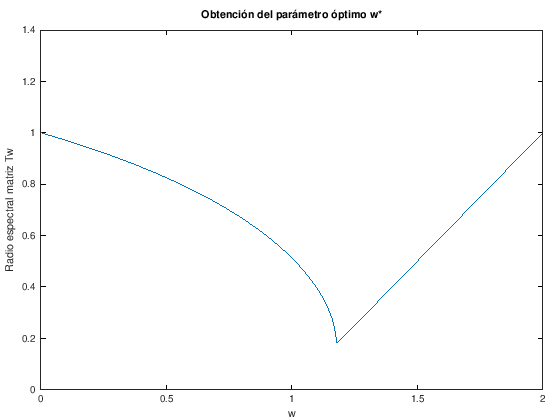

In [7]:
format long;
A=[[3 -1 -1 0 0] ; [-1 4 0 -2 0] ; [-1 0 3 -1 0]; [0 -2 -1 5 -1] ; [0 0 0 -1 2] ] ;
B= [2 ; -26 ; 3 ; 47 ;-10] ;

disp('Matriz A:')
disp(A)

%Definimos las matrices D,L y U
D=diag(diag(A,0));
L=-tril(A,-1);
U=-triu(A,1);
disp('Matriz diagonal:');
disp(D);
disp('Matriz triangular inferior');
disp(L);
disp('Matriz triangular superior');
disp(U);

%Calculamos las matrices de iteración de cada método
T_J=inv(D)*(L+U);
c_J=inv(D)*B;
T_GS=inv(D-L)*U;
c_GS=inv(D-L)*B;
T_w= @(w) inv(D-w*L)*((1-w)*D+w*U);
c_w= @(w) w*inv(D-w*L)*B;

disp('Matriz de iteración del método de Jacobi');
disp(T_J);
disp('Matriz de iteración del método de Gauss-Seidel');
disp(T_GS);

%Cálculo del radio espectral 
p_J=max(abs(eig(T_J)));
p_GS = max(abs(eig(T_GS)));

disp('Radio espectral de la matriz J');
disp(p_J);
disp('Radio espectral de la matriz GS');
disp(p_GS);
%Fijamos una tolerancia de error%
tol=0.001;

%Aplicación del método de Jacobi%
err_j=1;
X_j=ones(5,1);
Y_j=zeros(5,1);
k_j=0;
while err_j>= tol
    Y_j=X_j;
    X_j = T_J*X_j + c_J;
    err_j=norm(X_j-Y_j,inf);
    k_j=k_j+1;
end

disp('Solución con método de Jacobi:');
disp(X_j);
disp('Número de iteraciones del método de Jacobi:');
disp(k_j);
disp('error (Jacobi):');
disp(err_j);

%Aplicación del método de Gauss-Seidel%
X_gs=ones(5,1);
Y_gs=zeros(5,1);
k_gs=0;
err_gs=1;
while err_gs>= tol
    Y_gs=X_gs;
    X_gs = T_GS*X_gs +c_GS;
    err_gs=norm(X_gs-Y_gs,inf);
    k_gs=k_gs+1;
end

disp('Solución con método de Gauss-Seidel:');
disp(X_gs);
disp('Número de iteraciones con el método de Gauss Seidel:');
disp(k_gs);
disp('error (Gauss-Seidel):');
disp(err_gs);

%Obtención del parámetro w* óptimo de sobrerelajación%
R=zeros(201,1);
W=0:.01:2;
for i=1:201 
    R(i)=max(abs(eigs(T_w(W(i))))); 
end
plot(W,R);
xlabel('w','FontSize',13);
ylabel ('Radio espectral matriz Tw','FontSize',13);
title('Obtención del parámetro óptimo w*')

idx=find(R == min(R));
w_op=W(idx);
disp('Parámetro de sobrerelajación w* óptimo:');
disp(w_op);

%Aplicación del método de sobrerrelajación con el parámetro óptimo w*%
err_sor=1;
X_sor=ones(5,1);
Y_sor=zeros(5,1);
k_sor=0;

while err_sor>= tol
    Y_sor=X_sor;
    X_sor = T_w(w_op)*X_sor +c_w(w_op);
    err_sor=norm(X_sor-Y_sor,inf);
    k_sor=k_sor+1;
end

disp('Solución con método de sobrerelajación:');
disp(X_sor);
disp('Número de iteraciones con el método de sobrerelajación:');
disp(k_sor);
disp('error (SOR):');
disp(err_sor);

%Comparación de los métodos de Gauss-Seidel y sobrerelajación usando el
%parámetro óptimo%
K=zeros(14,3);
for i=1:14
    tol_i=10^(-i);
    err=1;
    K(i,1)=tol_i;
    X=ones(5,1);
    k=0;
    while err >= tol_i
        Y=X;
        X = T_w(w_op)*X +c_w(w_op);
        err=norm(X-Y);
        k=k+1;
    end
    K(i,2)=k;
    X=ones(5,1);
    Y=zeros(5,1);
    k=0;
    err=1;
    while err >= tol_i
        Y=X;
        X = T_GS*X +c_GS;
        err=norm(X-Y);
        k=k+1;
    end
    K(i,3)=k;
end

disp('Comparación del numero de iteraciones de Gauss-Seidel y Sobrerelajación dada una tolerancia:')
disp('     | Tolerancia |   | Sobrerelajación |   | Gauss Seidel |')
disp(K)

## Punto 6

In [5]:
graphics_toolkit('gnuplot');

## Método de Jacobi

Para implementar el método de Jacobi vamos a aprovechar que invertir la matriz diagonal es una tarea sencilla y eficiente, cosa que como veremos más adelante, no ocurre en Gauss-Seidel.

$$T_J=(D)^{-1}(U+L)$$

En este caso aprovechamos que la inversa de la matriz tiene como como coeficientes $1/a_{ii}$ para nuestro código, o sea no es necesario como tal invertirla en Matlab, solo dividimos.

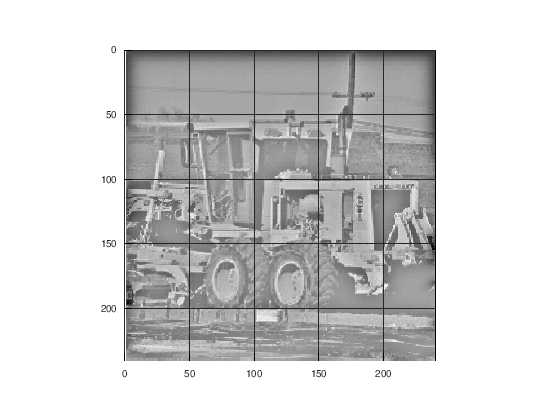

In [ ]:
load('bordes1.mat');

[n, m] = size(bordes1);
N = n * m; 
e = ones(N,1);
v = ones(N,1);
for i = 1:(n-1)
    v(i*m) = 0;
end
A = spdiags([e v -4*e v e], [-n -1 0 1 n], N, N);

f = bordes1(:);

u_jacobi = zeros(N,1);
max_iter = 100;
tol = 1e-6;
D = diag(diag(A));
R = A - D;

for k = 1:max_iter
    u_new = (f - R * u_jacobi) ./ diag(A);
    if norm(u_new - u_jacobi, inf) < tol
        break;
    end
    u_jacobi = u_new;
end

u_jacobi_img = reshape(u_jacobi, n, m);
figure;
surf(u_jacobi_img);
shading flat;
axis ij;
axis equal;
xlim([0 240]);
ylim([0 240]);
view(2);
colormap gray;

Este resultado se obtuvo de aplicar 1000 iteraciones, vamos a comparar con el método de Gauss-Seidel.

## Gauss- Seidel

Primero implementamos todo de manera matricial, esto no arrojó buenos resultado, correr una sola iteración costaba mucho tiempo dado el tamaño de la matriz y que en Gauss-Seidel la matriz a invertir es (D+L), esto es malo ya que invertir matrices es costoso y no es clara la forma que tendría su inversa para poder implementar un código que la compute, sin embargo hicimos 10 iteraciones para usando la forma no matricial para ejemplificar.

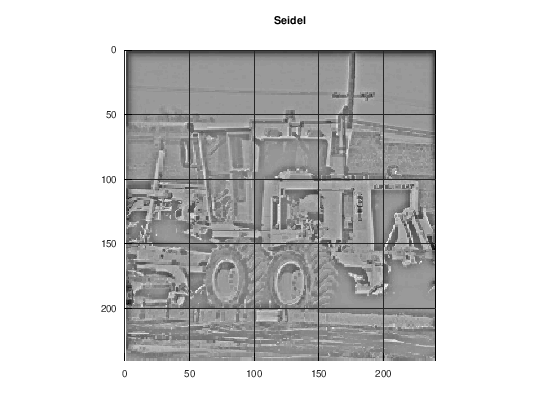

In [ ]:
load('bordes1.mat');

[n, m] = size(bordes1);
N = n * m; 
e = ones(N,1);
v = ones(N,1);
for i = 1:(n-1)
    v(i*m) = 0;
end
A = spdiags([e v -4*e v e], [-n -1 0 1 n], N, N);

f = bordes1(:);

u_gs = zeros(N,1);
max_iter = 10;
tol = 1e-6;

for k = 1:max_iter
    u_old = u_gs;  
    for i = 1:N
        suma = A(i,1:i-1) * u_gs(1:i-1) + A(i,i+1:N) * u_old(i+1:N);
        u_gs(i) = (f(i) - suma) / A(i,i);
    end
    if norm(u_gs - u_old, inf) < tol
        break;
    end
end

u_gs_img = reshape(u_gs, n, m);
figure;
surf(u_gs_img);
shading flat;
axis ij;
axis equal;
xlim([0 240]);
ylim([0 240]);
view(2);
colormap gray;
title('Seidel');

Luego en vista de lo anterior implementamos el método solo resolviendo las ecuaciones con la fórmula de la iteración sin necesidad de defininir la matriz $A$, esto fue una gran mejoría y comparando con Jacobi observamos una clara mejoría

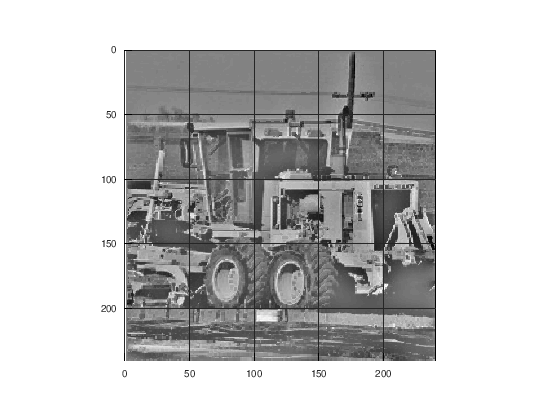

In [ ]:
load('bordes1.mat');
f = bordes1; 

[m, n] = size(f);
u = zeros(m, n);
max_iter = 100;
tol = 1e-6;

for iter = 1:max_iter
    u_old = u;
    for i = 2:m-1
        for j = 2:n-1
            u(i, j) = 0.25 * (-f(i, j) + u(i-1, j) + u_old(i+1, j) + u(i, j-1) + u_old(i, j+1));
        end
    end
    if norm(u - u_old, inf) < tol
        break;
    end
end

figure;
surf(u);
shading flat;
axis ij;
axis equal;
xlim([0 240]);
ylim([0 240]);
view(2);
colormap gray;


## SOR

Para SOR tomamos $1<w<2$ para acelerar la convergencia, concretamente $w=1.5$, en este caso se observa una clara mejoría con respecto a Jacobi y Seidel

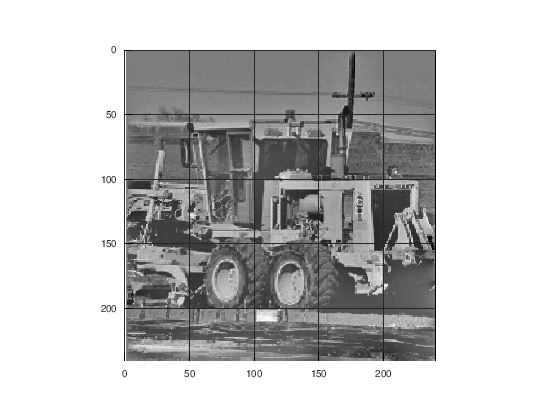

In [ ]:
load('bordes1.mat');
f = bordes1;

[m, n] = size(f);
h = 1;

omega = 1.5;
max_iter = 100;
tol = 1e-6;

u = zeros(m, n);

for iter = 1:max_iter
    u_old = u;
    for i = 2:m-1
        for j = 2:n-1
            u_gs = (1/4) * ( u(i-1, j) + u(i, j-1) + u_old(i+1, j) + u_old(i, j+1) - f(i, j));
            u(i, j) = (1 - omega) * u_old(i, j) + omega * u_gs;
        end
    end
    if norm(u - u_old, inf) < tol
        break;
    end
end

figure;
surf(u);
shading flat;
axis ij equal;
xlim([0 240]);
ylim([0 240]);
view(2);
colormap gray;

Ahora comparamos las 3 imágenes en un solo plot en el documento del taller